In [ ]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


In [ ]:
# ! F:\v\venv\Scripts\pip.exe install pandas

In [1]:
import pandas as pd 

In [84]:
df = pd.read_csv('archive_5/okcupid_profiles.csv')

In [51]:
df.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [53]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [54]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [55]:
x = df.isnull().mean() * 100  

In [56]:
df.shape

(59946, 31)

In [57]:
for col, perc in x.items():
    if perc > 0:
        print(f" {col},       {perc:.2f}%")

 body_type,       8.83%
 diet,       40.69%
 drinks,       4.98%
 drugs,       23.49%
 education,       11.06%
 ethnicity,       9.48%
 height,       0.01%
 job,       13.68%
 offspring,       59.32%
 pets,       33.23%
 religion,       33.74%
 sign,       18.44%
 smokes,       9.19%
 speaks,       0.08%
 essay0,       9.15%
 essay1,       12.63%
 essay2,       16.08%
 essay3,       19.14%
 essay4,       17.58%
 essay5,       18.10%
 essay6,       22.97%
 essay7,       20.77%
 essay8,       32.07%
 essay9,       21.02%


In [58]:
# ! F:\v\venv\Scripts\pip.exe install matplotlib

In [ ]:
import matplotlib.pyplot as plt

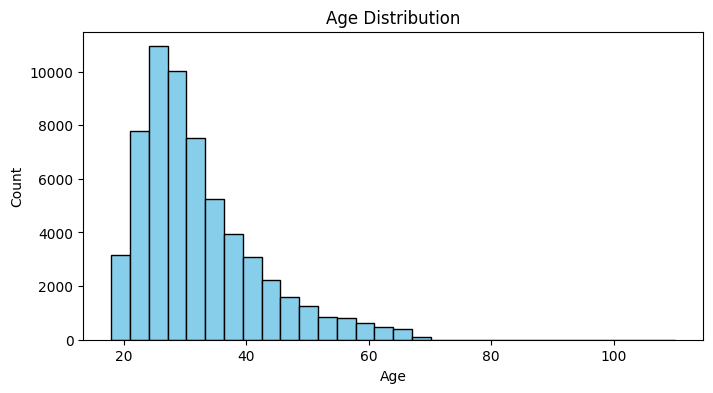

In [60]:

plt.figure(figsize=(8,4))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


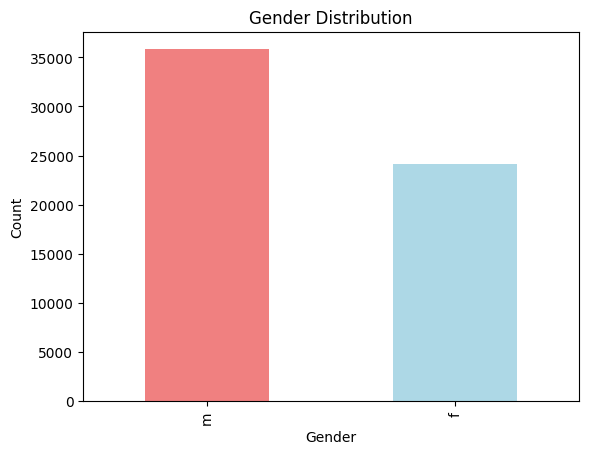

In [61]:
df['sex'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [62]:
df['education'].value_counts().head(10)

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
Name: count, dtype: int64

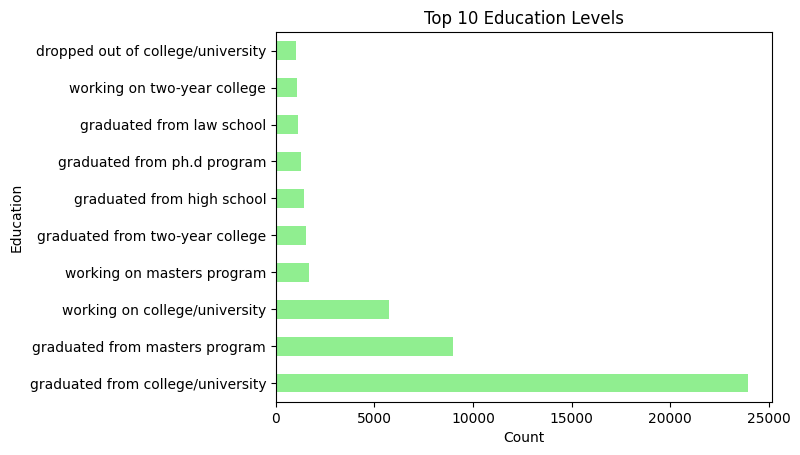

In [63]:
df['education'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Education Levels")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()


In [64]:
df['height'].fillna(df['height'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)


C:\Users\Ehsan\AppData\Local\Temp\ipykernel_20600\2468973598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(df['height'].median(), inplace=True)
C:\Users\Ehsan\AppData\Local\Temp\ipykernel_20600\2468973598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [65]:
categorical_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
                    'job', 'offspring', 'pets', 'religion', 'sign', 'smokes']

for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)


C:\Users\Ehsan\AppData\Local\Temp\ipykernel_20600\780989932.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [66]:
essay_cols = [f'essay{i}' for i in range(10)]
for col in essay_cols:
    df[col].fillna('', inplace=True)
    
# می‌توانیم همه essay ها را در یک ستون ترکیب کنیم:
df['essay_text'] = df[essay_cols].agg(' '.join, axis=1)


C:\Users\Ehsan\AppData\Local\Temp\ipykernel_20600\1682338650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)


In [67]:
x2 = df.isnull().mean() * 100  

In [68]:
for col, perc in x2.items():
    if perc > 0:
        print(f" {col},       {perc:.2f}%")

 speaks,       0.08%


In [69]:
df["speaks"].head(5)

0                                              english
1    english (fluently), spanish (poorly), french (...
2                                 english, french, c++
3                             english, german (poorly)
4                                              english
Name: speaks, dtype: object

In [70]:
df = df.dropna(subset=['speaks'])
print(df.isnull().sum()['speaks'])

0


In [71]:
col = 'education'  # یا هر ستون دلخواه

# گرفتن ۱۰ مقدار پرکاربرد
top_10 = df[col].value_counts().nlargest(10).index

# مقادیر غیر از Top 10 را با 'Other' جایگزین
df[col] = df[col].apply(lambda x: x if x in top_10 else 'Other')


In [72]:
df.shape

(59896, 32)

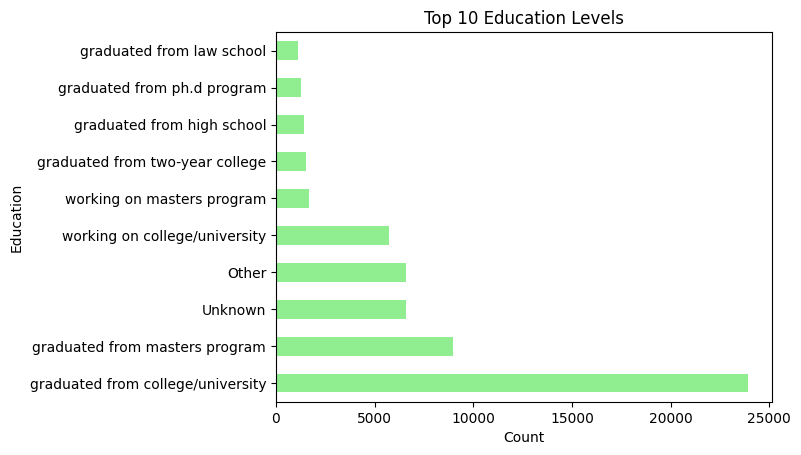

In [73]:
df['education'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Education Levels")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()


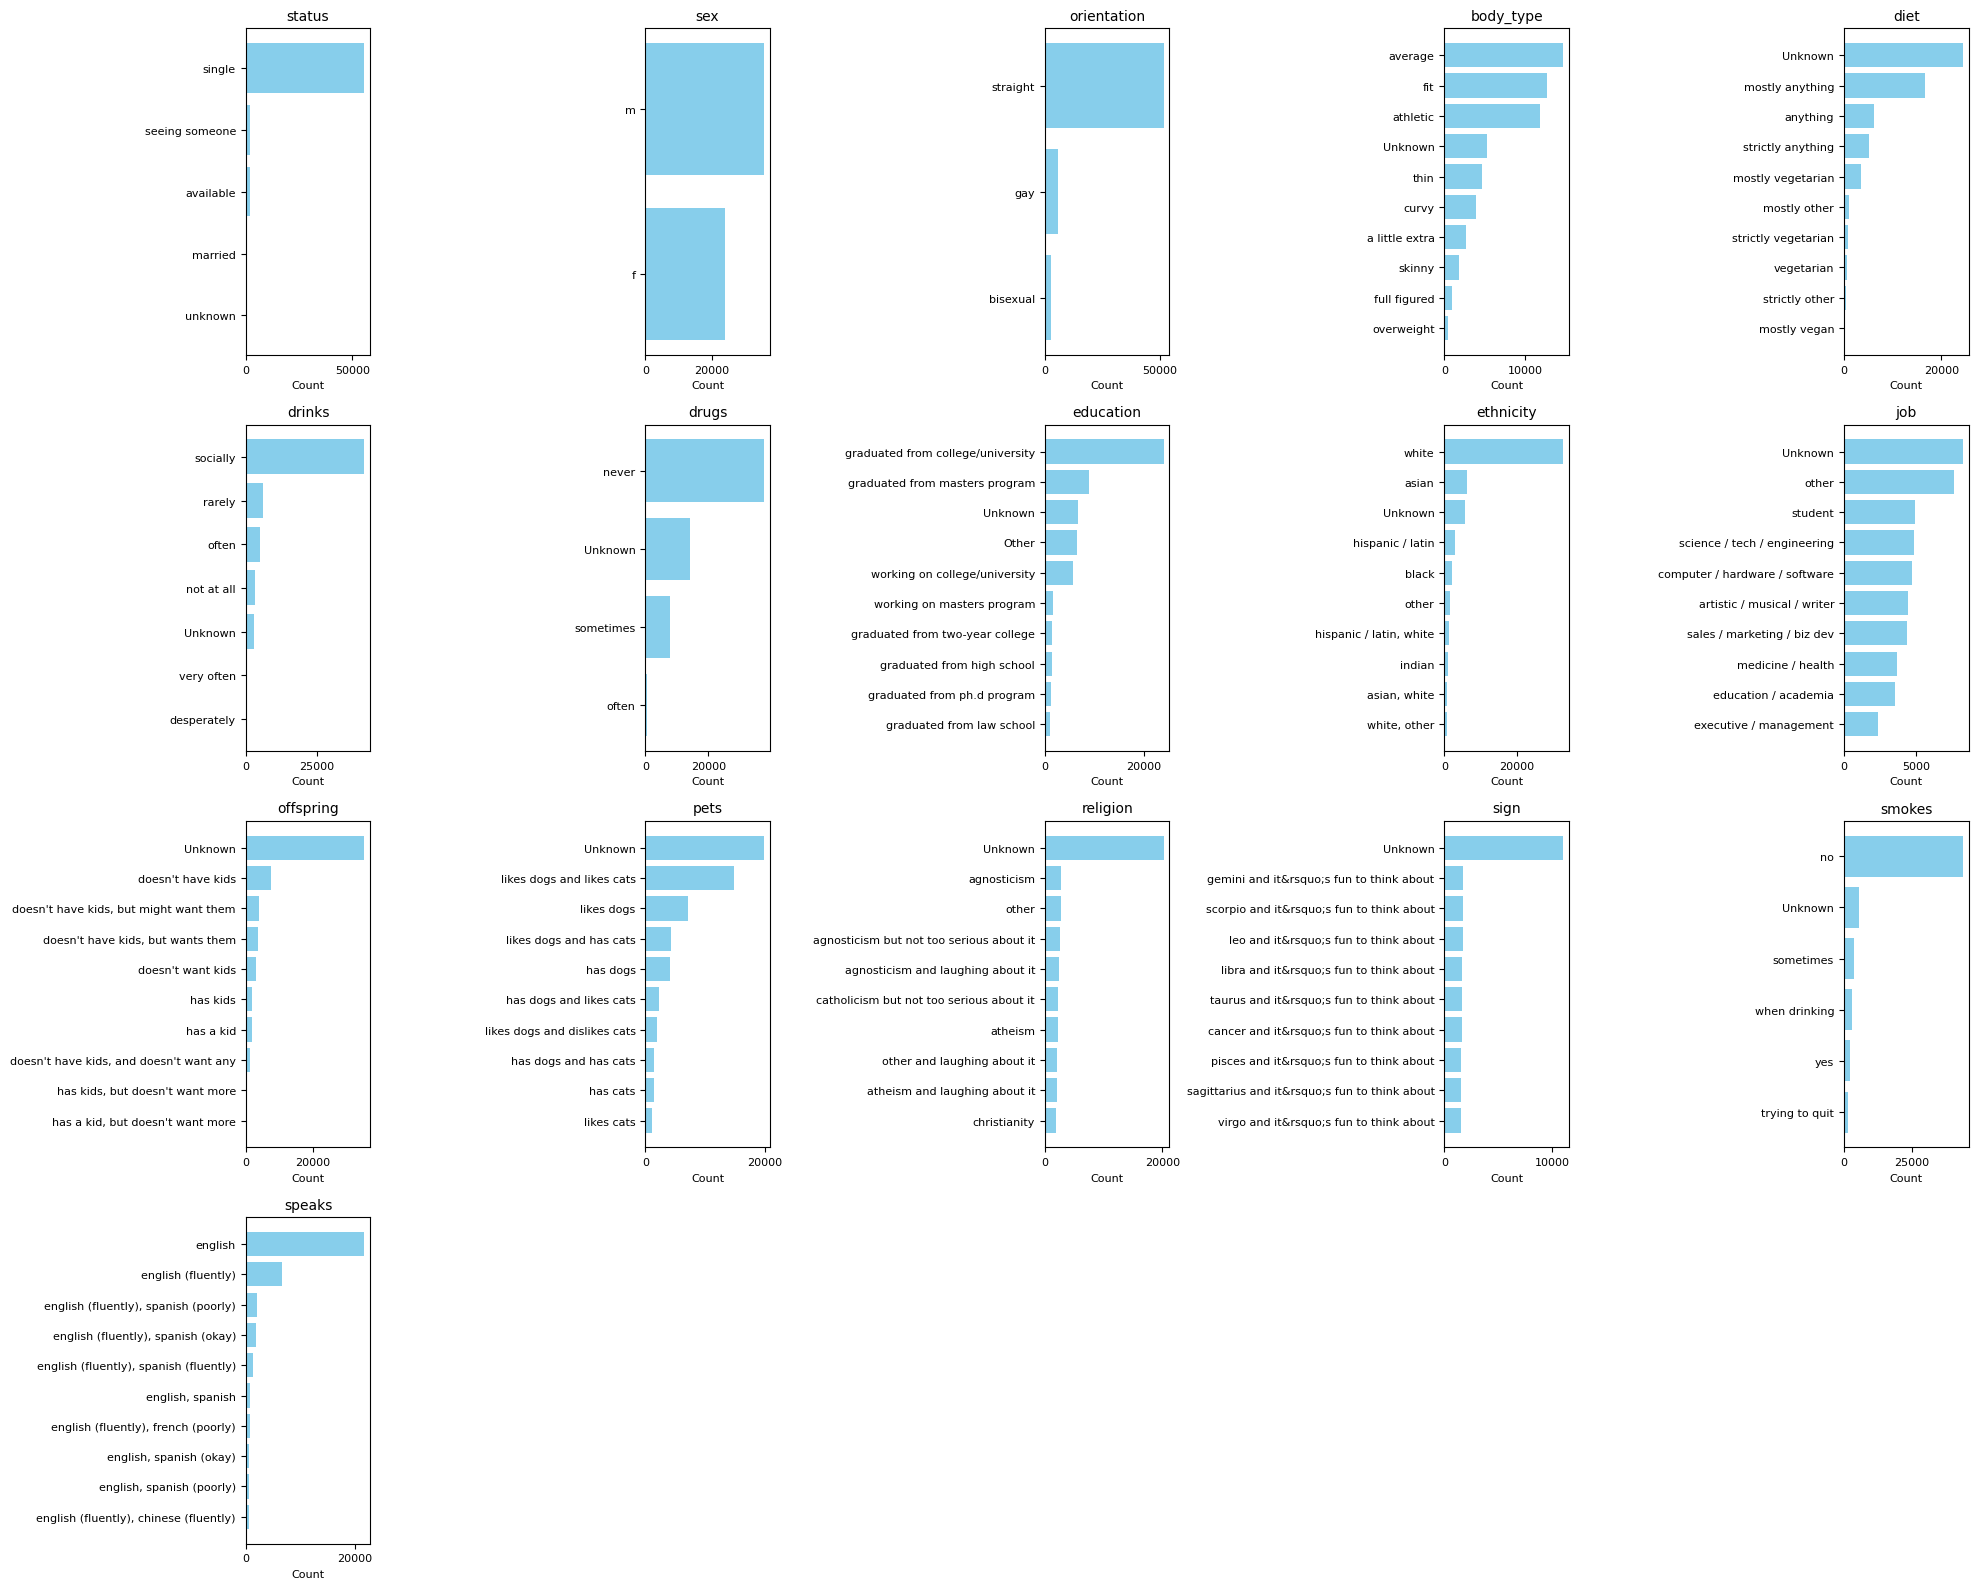

In [104]:
import matplotlib.pyplot as plt

categorical_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 
                    'drugs', 'education', 'ethnicity', 'job', 'offspring', 'pets', 
                    'religion', 'sign', 'smokes', 'speaks']

# تنظیم تعداد ردیف و ستون برای subplot ها
n_cols = 5
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # محاسبه ceil تعداد ردیف‌ها

plt.figure(figsize=(20, 4*n_rows))  # اندازه کلی Figure

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    top_10 = df[col].value_counts().nlargest(10)
    plt.barh(top_10.index, top_10.values, color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel("Count", fontsize=8)
    plt.ylabel("")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [86]:
# ! F:\v\venv\Scripts\pip.exe install scikit-learn

In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
num_cols = ['age', 'height', 'income']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59896 entries, 0 to 59945
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59896 non-null  float64
 1   status       59896 non-null  object 
 2   sex          59896 non-null  object 
 3   orientation  59896 non-null  object 
 4   body_type    59896 non-null  object 
 5   diet         59896 non-null  object 
 6   drinks       59896 non-null  object 
 7   drugs        59896 non-null  object 
 8   education    59896 non-null  object 
 9   ethnicity    59896 non-null  object 
 10  height       59896 non-null  float64
 11  income       59896 non-null  float64
 12  job          59896 non-null  object 
 13  last_online  59896 non-null  object 
 14  location     59896 non-null  object 
 15  offspring    59896 non-null  object 
 16  pets         59896 non-null  object 
 17  religion     59896 non-null  object 
 18  sign         59896 non-null  object 
 19  smokes   

In [90]:
df.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essay_text
0,-1.093466,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...
1,0.281799,single,m,straight,average,mostly other,often,sometimes,Other,white,...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,,,i am very open and will share just about anyth...,,i am a chef: this is what that means. 1. i am ...
2,0.599167,available,m,straight,thin,anything,socially,Unknown,graduated from masters program,Unknown,...,"i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te..."
3,-0.987676,single,m,straight,thin,vegetarian,socially,Unknown,working on college/university,white,...,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",,cats and german philosophy,,,you feel so inclined.,i work in a library and go to school. . . read...
4,-0.352939,single,m,straight,athletic,Unknown,socially,never,graduated from college/university,"asian, black, other",...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",,,,,,hey how's it going? currently vague on the pro...


In [105]:
essay_cols = [f'essay{i}' for i in range(10)] + ['essay_text']

df_essays = df[essay_cols].head()
# essay_cols
df_essays


,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essay_text
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,,,i am very open and will share just about anyth...,,i am a chef: this is what that means. 1. i am ...
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",,cats and german philosophy,,,you feel so inclined.,i work in a library and go to school. . . read...
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",,,,,,hey how's it going? currently vague on the pro...


In [98]:
df_features = df.drop(columns=essay_cols)
# df_features.head() 
df_features.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks'],
      dtype='object')

In [106]:
df_features.to_csv("df_features.csv", index=False)
df_essays.to_csv("df_essays.csv", index=False)  

In [108]:
df_essays.shape

(5, 11)

In [109]:
import numpy as np

In [110]:
categorical_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 
                    'drugs', 'education', 'ethnicity', 'job', 'offspring', 'pets', 
                    'religion', 'sign', 'smokes', 'speaks']

In [111]:
# تشخیص high و low cardinality
high_cardinality_cols = [col for col in df_features.columns if df_features[col].nunique() > 10]
low_cardinality_cols  = [col for col in df_features.columns if df_features[col].nunique() <= 10]

In [112]:
for col in high_cardinality_cols:
    freq = df_features[col].value_counts()
    df_features[col+'_freq'] = df_features[col].map(freq)
    df_features.drop(columns=[col], inplace=True)

In [113]:
df_features = pd.get_dummies(df_features, columns=low_cardinality_cols, drop_first=True)

In [ ]:

# df_text = df_features[['essay_text']].copy()
# df_features = df_features.drop(columns=['essay_text'])

In [114]:
df_features.head()

,age_freq,body_type_freq,diet_freq,education_freq,ethnicity_freq,height_freq,income_freq,job_freq,last_online_freq,location_freq,...,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,1934,2626,5110,5712,811,1380,48397,366,3,416,...,True,False,True,False,False,False,True,False,False,False
1,1753,14643,1007,6575,32799,6072,1111,1363,11,7213,...,False,False,False,False,True,True,False,False,False,False
2,1327,4706,6179,8950,5679,5445,48397,8182,4,31029,...,True,False,False,False,False,True,False,False,False,False
3,2592,4706,666,5712,32799,4825,2952,4880,4,4211,...,True,False,False,False,False,True,False,False,False,False
4,3294,11809,24366,23938,9,4756,48397,4437,4,31029,...,True,False,True,False,False,True,False,False,False,False


In [115]:
df_features.shape

(59896, 36)

In [116]:
df_features.to_csv("df_features2.csv", index=False)

In [3]:
df1 = pd.read_csv("df_features2.csv")
df1.head(5)

,age_freq,body_type_freq,diet_freq,education_freq,ethnicity_freq,height_freq,income_freq,job_freq,last_online_freq,location_freq,...,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,1934,2626,5110,5712,811,1380,48397,366,3,416,...,True,False,True,False,False,False,True,False,False,False
1,1753,14643,1007,6575,32799,6072,1111,1363,11,7213,...,False,False,False,False,True,True,False,False,False,False
2,1327,4706,6179,8950,5679,5445,48397,8182,4,31029,...,True,False,False,False,False,True,False,False,False,False
3,2592,4706,666,5712,32799,4825,2952,4880,4,4211,...,True,False,False,False,False,True,False,False,False,False
4,3294,11809,24366,23938,9,4756,48397,4437,4,31029,...,True,False,True,False,False,True,False,False,False,False


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59896 entries, 0 to 59895
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age_freq               59896 non-null  int64
 1   body_type_freq         59896 non-null  int64
 2   diet_freq              59896 non-null  int64
 3   education_freq         59896 non-null  int64
 4   ethnicity_freq         59896 non-null  int64
 5   height_freq            59896 non-null  int64
 6   income_freq            59896 non-null  int64
 7   job_freq               59896 non-null  int64
 8   last_online_freq       59896 non-null  int64
 9   location_freq          59896 non-null  int64
 10  offspring_freq         59896 non-null  int64
 11  pets_freq              59896 non-null  int64
 12  religion_freq          59896 non-null  int64
 13  sign_freq              59896 non-null  int64
 14  speaks_freq            59896 non-null  int64
 15  status_married         59896 non-nul

In [8]:
df1.describe()

,age_freq,body_type_freq,diet_freq,education_freq,ethnicity_freq,height_freq,income_freq,job_freq,last_online_freq,location_freq,offspring_freq,pets_freq,religion_freq,sign_freq,speaks_freq
count,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000
mean,2298.222552,9890.112495,15816.684453,13089.046347,19456.644884,4286.887872,39395.378322,4690.526579,5.501670,17403.610158,22775.246026,11986.569086,7965.846701,3152.512088,8915.009483
std,1160.161162,4686.876750,8619.204504,9089.540713,14768.651385,1492.653740,18471.540176,2271.337876,5.335521,14266.547210,15472.833832,7155.347695,8768.985476,3756.149052,9967.866933
min,1.000000,194.000000,11.000000,1073.000000,1.000000,1.000000,48.000000,204.000000,1.000000,1.000000,21.000000,44.000000,13.000000,41.000000,1.000000
25%,1282.000000,4706.000000,6179.000000,6575.000000,2822.000000,2812.000000,48397.000000,3511.000000,1.000000,910.000000,3869.000000,4311.000000,1517.000000,1299.000000,44.000000
50%,2586.000000,11809.000000,16577.000000,8950.000000,32799.000000,4825.000000,48397.000000,4707.000000,3.000000,31029.000000,35525.000000,14806.000000,2495.000000,1497.000000,2059.000000
75%,3294.000000,12704.000000,24366.000000,23938.000000,32799.000000,5346.000000,48397.000000,7587.000000,9.000000,31029.000000,35525.000000,19892.000000,20216.000000,1690.000000,21828.000000
max,3724.000000,14643.000000,24366.000000,23938.000000,32799.000000,6072.000000,48397.000000,8182.000000,24.000000,31029.000000,35525.000000,19892.000000,20216.000000,11036.000000,21828.000000


In [9]:
df1.columns

Index(['age_freq', 'body_type_freq', 'diet_freq', 'education_freq',
       'ethnicity_freq', 'height_freq', 'income_freq', 'job_freq',
       'last_online_freq', 'location_freq', 'offspring_freq', 'pets_freq',
       'religion_freq', 'sign_freq', 'speaks_freq', 'status_married',
       'status_seeing someone', 'status_single', 'status_unknown', 'sex_m',
       'orientation_gay', 'orientation_straight', 'drinks_desperately',
       'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes',
       'smokes_no', 'smokes_sometimes', 'smokes_trying to quit',
       'smokes_when drinking', 'smokes_yes'],
      dtype='object')

"income_freq

height_freq

age_freq"

In [15]:
df_male = df1[df1['sex_m'] == 1]
df_feamale = df1[df1['sex_m'] == 0]

In [35]:
df_male.head(7)

,age_freq,body_type_freq,diet_freq,education_freq,ethnicity_freq,height_freq,income_freq,job_freq,last_online_freq,location_freq,...,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,1934,2626,5110,5712,811,1380,48397,366,3,416,...,True,False,True,False,False,False,True,False,False,False
1,1753,14643,1007,6575,32799,6072,1111,1363,11,7213,...,False,False,False,False,True,True,False,False,False,False
2,1327,4706,6179,8950,5679,5445,48397,8182,4,31029,...,True,False,False,False,False,True,False,False,False,False
3,2592,4706,666,5712,32799,4825,2952,4880,4,4211,...,True,False,False,False,False,True,False,False,False,False
4,3294,11809,24366,23938,9,4756,48397,4437,4,31029,...,True,False,True,False,False,True,False,False,False,False
5,3294,14643,16577,23938,32799,5346,48397,4707,12,31029,...,True,False,False,False,False,True,False,False,False,False
9,1423,11809,16577,1073,32799,3792,48397,4880,3,1330,...,False,False,True,False,False,True,False,False,False,False


In [17]:
df_feamale.head(5)

,age_freq,body_type_freq,diet_freq,education_freq,ethnicity_freq,height_freq,income_freq,job_freq,last_online_freq,location_freq,...,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
6,2586,12704,5110,23938,640,3792,48397,8182,6,31029,...,True,False,True,False,False,False,False,False,False,False
7,2732,14643,16577,23938,32799,3792,48397,4437,11,31029,...,True,False,True,False,False,True,False,False,False,False
8,3242,5290,5110,23938,32799,5346,48397,8182,20,57,...,True,False,False,False,False,False,False,False,True,False
13,3141,1774,16577,1428,32799,4756,1048,4385,2,31029,...,True,False,True,False,False,True,False,False,False,False
14,3294,4706,16577,5712,1300,2243,974,7587,7,651,...,True,False,True,False,False,True,False,False,False,False


In [18]:
df_feamale.shape, df_male.shape

((24102, 36), (35794, 36))

In [ ]:

similarity_matrix = cosine_similarity(df_male, df_feamale)


In [24]:
df_male.iterrows()

<generator object DataFrame.iterrows at 0x00000165DF739360>

In [23]:
top_matches = {}

for i, (idx, man) in enumerate(df_male.iterrows()):
    # i: شماره ردیف در similarity_matrix
    # idx: index اصلی دیتافریم (مثلاً 35794)
    top_indices = np.argsort(similarity_matrix[i])[::-1][:5]
    matched_women = df_feamale.iloc[top_indices]
    top_matches[idx] = matched_women.index.tolist()


In [ ]:
# top_indices

array([13139, 23679,  7768])

In [38]:
df2 = pd.read_csv("df_features.csv")

In [ ]:
# "income_freq

# height_freq

# age_freq"

In [94]:
def show_matches_for_man1(man_id, df2, scaler, top_k=5):
    if man_id not in df_male.index:
        print(f"❌ مرد با ID={man_id} پیدا نشد.")
        return

    # پیدا کردن ایندکس در ماتریس شباهت
    i = list(df_male.index).index(man_id)
    man = df_male.loc[man_id]
    top_indices = np.argsort(similarity_matrix[i])[::-1][:top_k]

    # بازگرداندن مقدار واقعی (age, height, income)
    man_scaled = np.array([[man['age_freq'], man['height_freq'], man['income_freq']]])
    man_real = scaler.inverse_transform(man_scaled)[0]
    man_age_real = man_real[0]

    man_job = df2.loc[man_id, 'job']

    print(f"\n👨‍🦱 مرد {man_id} | سن واقعی: {man_age_real:.1f} | شغل: {man_job}")
    print("--------------------------------------------------")

    for wid in top_indices:
        woman = df_feamale.iloc[wid]
        sim_score = similarity_matrix[i][wid]

        woman_scaled = np.array([[woman['age_freq'], woman['height_freq'], woman['income_freq']]])
        woman_real = scaler.inverse_transform(woman_scaled)[0]
        woman_age_real = woman_real[0]

        woman_job = df2.loc[df_feamale.index[wid], 'job']

        print(f"   ❤️ زن {df_feamale.index[wid]} | سن واقعی: {woman_age_real:.1f} | شغل: {woman_job} | شباهت: {sim_score:.3f}")


In [98]:
matches_df = show_matches_for_man1(0, df2, scaler, top_k=3)
matches_df


👨‍🦱 مرد 0 | سن واقعی: 18313.9 | شغل: transportation
--------------------------------------------------
   ❤️ زن 4394 | سن واقعی: 33409.8 | شغل: clerical / administrative | شباهت: 0.994
   ❤️ زن 56095 | سن واقعی: 34856.1 | شغل: student | شباهت: 0.993
   ❤️ زن 25852 | سن واقعی: 35234.2 | شغل: medicine / health | شباهت: 0.993


In [101]:
df.loc[4394]


age                                                           24
status                                                    single
sex                                                            f
orientation                                             straight
body_type                                                average
diet                                                    anything
drinks                                                  socially
drugs                                                      never
education                            working on two-year college
ethnicity                          asian, native american, white
height                                                      59.0
income                                                        -1
job                                                          NaN
last_online                                     2012-06-16-11-17
location                               san francisco, california
offspring                

In [92]:
df.loc[0]

age                                                           22
status                                                    single
sex                                                            m
orientation                                             straight
body_type                                         a little extra
diet                                           strictly anything
drinks                                                  socially
drugs                                                      never
education                          working on college/university
ethnicity                                           asian, white
height                                                      75.0
income                                                        -1
job                                               transportation
last_online                                     2012-06-28-20-30
location                         south san francisco, california
offspring                

In [ ]:
def show_matches_for_man(man_id, top_k=5):
    # بررسی وجود ID در داده‌ها
    if man_id not in df_male.index:
        print(f"❌ مرد با ID={man_id} پیدا نشد.")
        return

    # پیدا کردن شماره سطر در similarity_matrix
    i = list(df_male.index).index(man_id)
    man = df_male.loc[man_id]

    # پیدا کردن بالاترین شباهت‌ها
    top_indices = np.argsort(similarity_matrix[i])[::-1][:top_k]

    print(f"\n👨‍🦱 مرد {man_id} | سن: {man['age_freq']} | شغل: {man['job_freq']}")
    print("--------------------------------------------------")

    for wid in top_indices:
        woman = df_feamale.iloc[wid]
        sim_score = similarity_matrix[i][wid]
        print(f"   ❤️ زن {df_feamale.index[wid]} | سن: {woman['age_freq']} | شغل: {woman['job_freq']} | شباهت: {sim_score:.3f}")


In [34]:
show_matches_for_man(0, top_k=3)


👨‍🦱 مرد 0 | سن: 1934 | شغل: 366
--------------------------------------------------
   ❤️ زن 4394 | سن: 3531 | شغل: 805 | شباهت: 0.994
   ❤️ زن 56095 | سن: 3684 | شغل: 4880 | شباهت: 0.993
   ❤️ زن 25852 | سن: 3724 | شغل: 3675 | شباهت: 0.993


In [30]:
matches_data = []

for i, (idx, man) in enumerate(df_male.iterrows()):
    top_indices = np.argsort(similarity_matrix[i])[::-1][:3]
    for wid in top_indices:
        matches_data.append({
            'man_id': idx,
            'woman_id': df_feamale.index[wid],
            'similarity': similarity_matrix[i][wid]
        })

matches_df = pd.DataFrame(matches_data)
